In [1]:
import numpy as np
import pandas as pd
import pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
%matplotlib inline
mpl.rc('font',size=21,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
wd = '/Volumes/eSSD0/Papers/GRL_G1RF/data/'
compsets = ['F1850CN','piClim-abrupt-4xCO2','piClim-abrupt-SOLr','piClim-G1']#'piClim-G1_redux']

lat = np.linspace(-90,90,46)
lon = np.linspace(0,355,72)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat[:,None],(1,72))

data = {}
for i in range(len(compsets)):  
    data[compsets[i]] = np.nanmean(\
        pk.load(open(wd+'interpolated/F_'+compsets[i]+'_diag_grid_int.pi','rb'))['fnet'],axis=0)
    
delta = {}
delta['sol'] = data['piClim-abrupt-SOLr']-data['F1850CN']
delta['x4'] = data['piClim-abrupt-4xCO2']-data['F1850CN']
delta['G1'] = data['piClim-G1']-data['F1850CN']
#delta['G1_rx'] = data['piClim-G1_redux']-data['F1850CN']
delta['G1L'] = delta['sol']+delta['x4']

delta_zm = {}
delta_gam = {}
for keys in delta.keys():
    delta_zm[keys] = np.nanmean(delta[keys],axis=1)
    delta_gam[keys] = np.average(delta[keys],weights=coslat)

In [3]:
delta_gam

{'sol': -6.637110252929862,
 'x4': 7.2085458478327915,
 'G1': 0.881050415094616,
 'G1L': 0.5714355953393252}

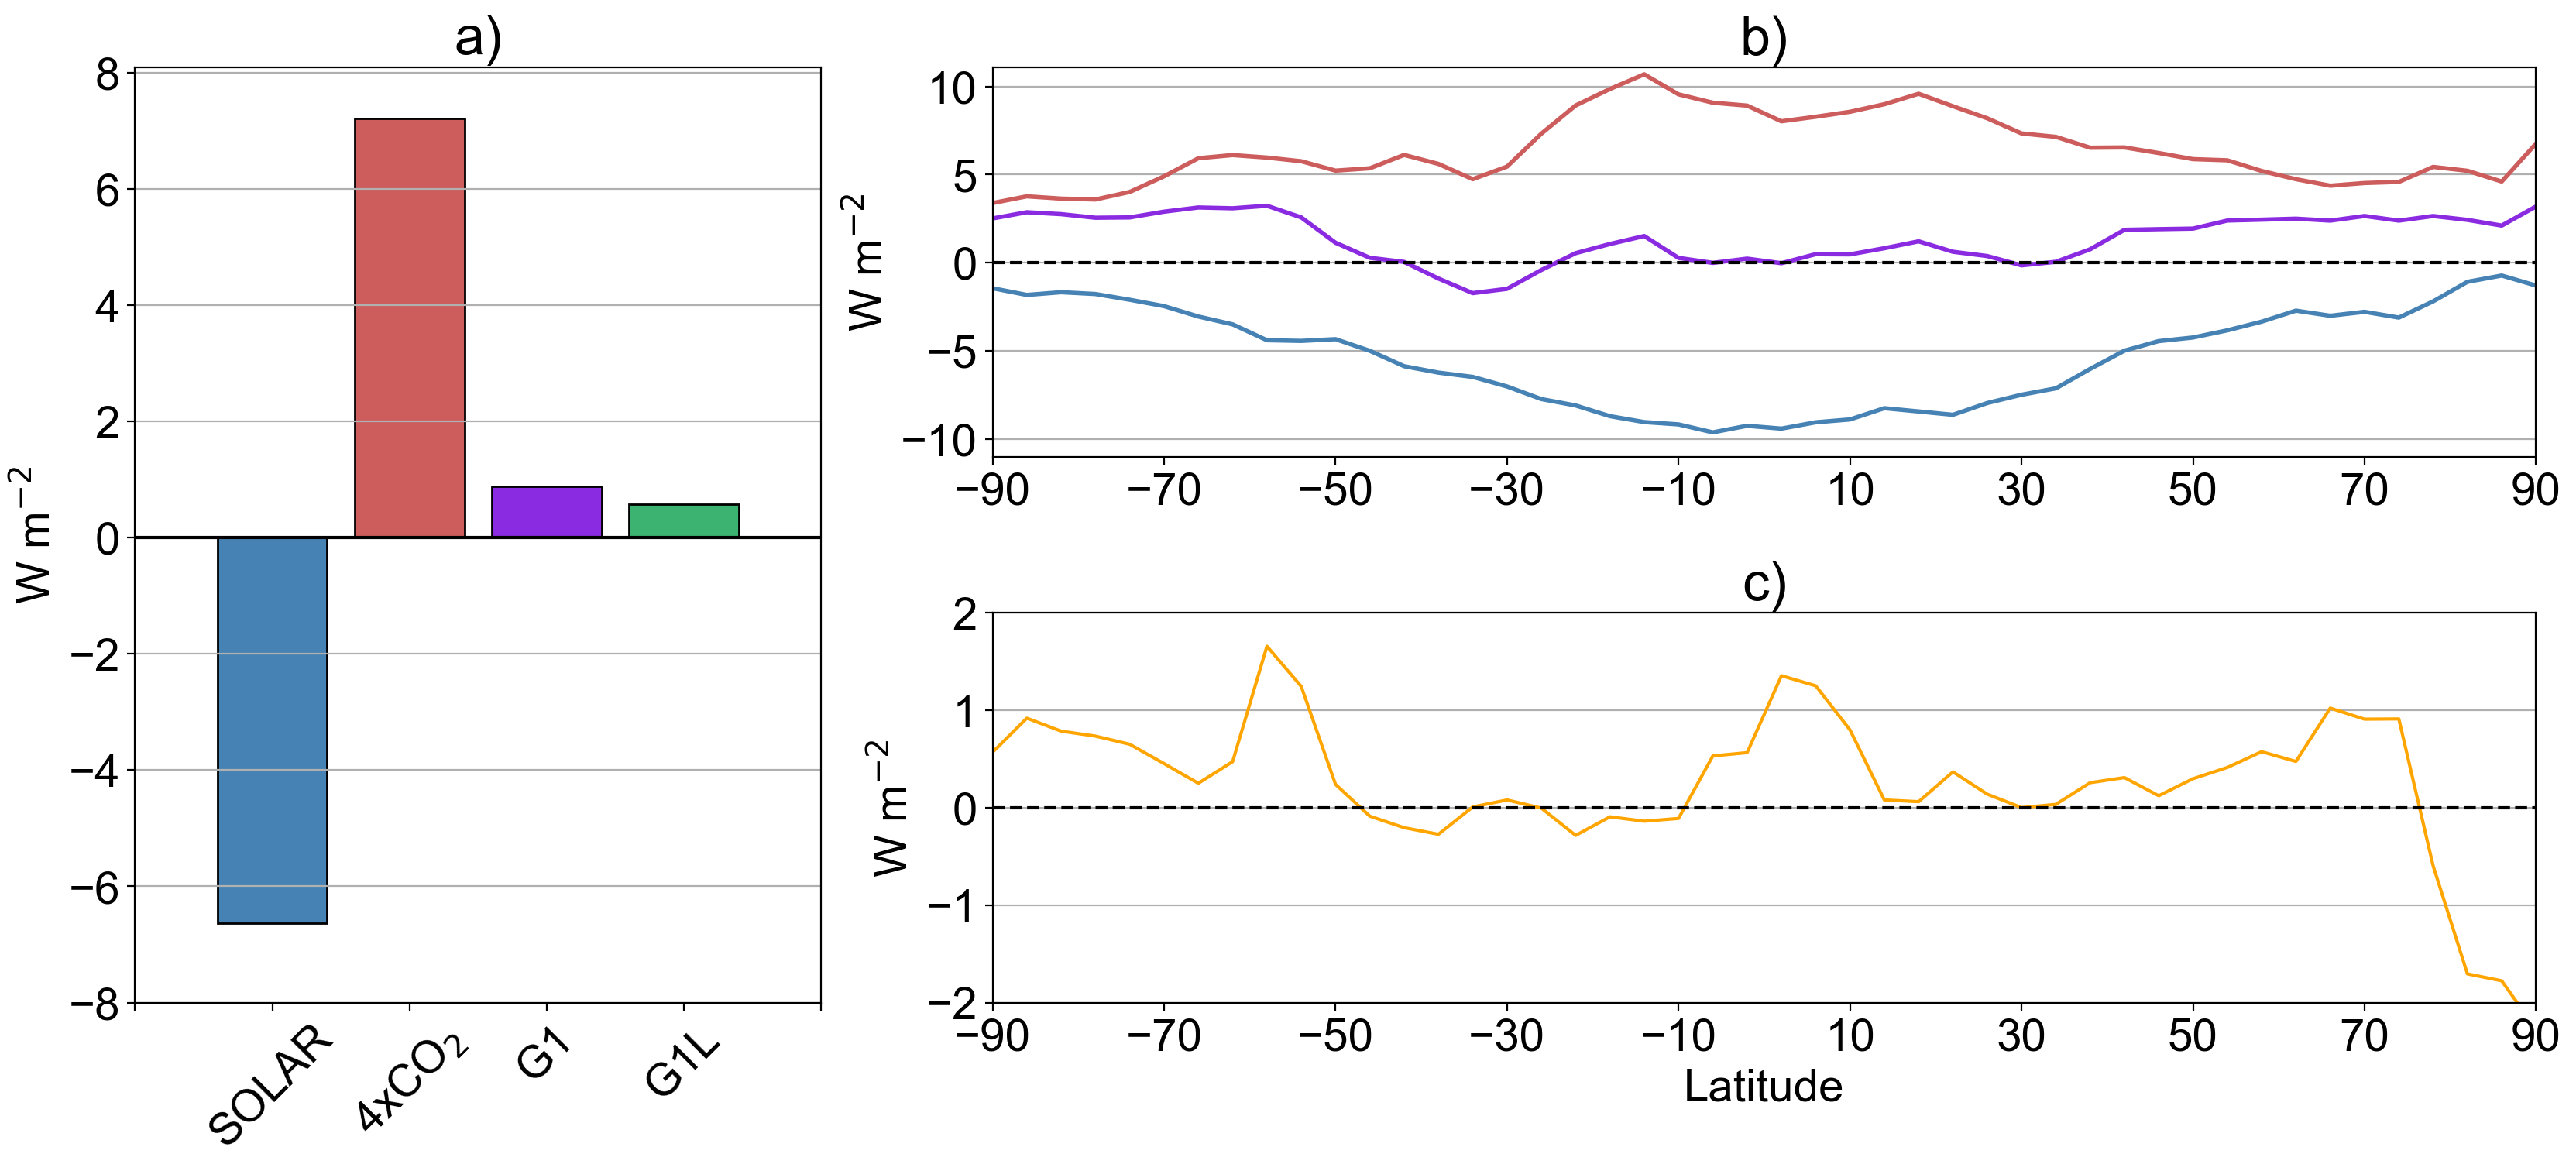

In [4]:
plt.figure(figsize=(20,8),dpi=200)

plt.subplot2grid((2, 3), (0, 0), rowspan=2)
plt.title('a)')
plt.bar(1,delta_gam['sol'],edgecolor='k',color='steelblue')
plt.bar(2,delta_gam['x4'],edgecolor='k',color='indianred')
plt.bar(3,delta_gam['G1'],edgecolor='k',color='blueviolet')
plt.bar(4,delta_gam['G1L'],edgecolor='k',color='mediumseagreen')
plt.axhline(0,color='k',linestyle='-')
plt.ylim(-8,8.1)
plt.grid(axis='y')
plt.yticks(np.arange(-8,8.1,2))
plt.xticks(np.arange(0,6),labels=['','SOLAR','4xCO$_{2}$','G1','G1L',''],rotation=45)
plt.ylabel('W m$^{-2}$')

plt.subplot2grid((2, 3), (0, 1), colspan=2, rowspan=1)
plt.title('b)')
plt.plot(lat,delta_zm['G1'],linewidth=2,color='blueviolet',label='G1')
#plt.plot(lat,delta_zm['G1L'],linewidth=2,color='mediumseagreen',label='G1L')
plt.plot(lat,delta_zm['sol'],linewidth=2,color='steelblue',label='SOLAR')
plt.plot(lat,delta_zm['x4'],linewidth=2,color='indianred',label='4xCO$_{2}$')
plt.grid(axis='y')
plt.ylim(-11,11.1)
plt.yticks(np.arange(-10,10.1,5))
plt.xticks(np.arange(-90,90.1,20), labels = None)
plt.axhline(0,color='k',linestyle='--')
plt.ylabel('W m$^{-2}$')
#plt.xlabel('Latitude')
#leg = plt.legend(ncol=2)
#leg.get_frame().set_edgecolor('k')
plt.margins(x=0)

plt.subplot2grid((2, 3), (1, 1), colspan=2, rowspan=1)
plt.title('c)')
#plt.plot(lat,delta_zm['G1'],linewidth=2,color='blueviolet',label='G1')
#plt.plot(lat,delta_zm['G1L'],linewidth=2,color='mediumseagreen',label='G1L')
plt.plot(lat,delta_zm['G1']-delta_zm['G1L'],color='orange',label='Residual')
plt.grid(axis='y')
plt.ylim(-2,2,1)
plt.yticks(np.arange(-2,2.1,1))
plt.xticks(np.arange(-90,90.1,20))
plt.axhline(0,color='k',linestyle='--')
plt.ylabel('W m$^{-2}$')
plt.xlabel('Latitude')
#leg = plt.legend(ncol=1)
#leg.get_frame().set_edgecolor('k')
plt.margins(x=0)

plt.subplots_adjust(wspace=0.25,hspace=0.4)

plt.savefig('ERF_ZM.png',bbox_inches='tight')